In [223]:
#Description: This program classfies patients as having Anaemic Disease or not using ML & Artificial Neural Networks (ANN)

In [224]:
#Importing Libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import keras as k
import seaborn as sns                     # data visualization library based on matplotlib
import sklearn                            # for random forests, and k-neighbours etc 

sns.set(rc={'figure.figsize':(12,8)})

In [225]:
#Load the data
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Anaemia1.csv')

#Print the first 10 rows
df.head(10)

Saving Anaemia1.csv to Anaemia1 (11).csv


,S. No.,Age,Sex,Haemoglobin,MCH,MCHC,MCV,RBC,Platlets,IDENTIFICATION
0,1,28,0,14.9,22.7,29.1,83.7,5.66,128.3,Not Anaemia
1,2,41,0,15.9,25.4,28.3,72.0,4.78,419.0,Not Anaemia
2,3,40,1,9.0,21.5,29.6,71.2,4.65,325.0,Anaemia
3,4,76,0,14.9,16.0,31.4,87.5,4.24,264.0,Not Anaemia
4,5,20,1,14.7,22.0,28.2,99.5,4.14,196.0,Not Anaemia
5,6,24,0,11.6,22.3,30.9,74.5,4.29,233.0,Anaemia
6,7,28,1,12.7,19.5,28.9,82.9,4.98,213.0,Anaemia
7,8,14,0,12.7,28.5,28.2,92.3,4.97,229.0,Anaemia
8,9,16,0,14.1,29.7,30.5,75.2,4.16,211.0,Not Anaemia
9,10,62,0,14.9,25.8,31.3,82.9,5.25,151.0,Not Anaemia


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   S. No.          199 non-null    int64  
 1   Age             199 non-null    int64  
 2   Sex             199 non-null    int64  
 3   Haemoglobin     199 non-null    float64
 4   MCH             199 non-null    float64
 5   MCHC            199 non-null    float64
 6   MCV             199 non-null    float64
 7   RBC             199 non-null    float64
 8   Platlets        199 non-null    float64
 9   IDENTIFICATION  199 non-null    object 
dtypes: float64(6), int64(3), object(1)
memory usage: 15.7+ KB


In [227]:
#Get the shape of the data (the number of rows & cols)
df.shape

(199, 10)

In [228]:
df.describe()

,S. No.,Age,Sex,Haemoglobin,MCH,MCHC,MCV,RBC,Platlets
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,100.000000,42.341709,0.402010,13.554774,22.611055,30.104523,84.294472,4.263970,214.448744
std,57.590508,18.788666,0.491541,2.002540,3.998810,2.121375,12.006880,0.817041,100.020943
min,1.000000,11.000000,0.000000,6.900000,11.400000,11.400000,11.400000,1.960000,10.000000
25%,50.500000,27.500000,0.000000,11.850000,19.300000,29.150000,76.700000,3.715000,150.000000
50%,100.000000,40.000000,0.000000,13.400000,22.300000,30.300000,84.400000,4.330000,198.000000
75%,149.500000,57.000000,1.000000,15.200000,25.450000,31.300000,92.900000,4.770000,258.500000
max,199.000000,89.000000,1.000000,16.900000,30.000000,32.500000,101.500000,6.900000,589.000000


In [229]:
df.isnull().sum()

S. No.            0
Age               0
Sex               0
Haemoglobin       0
MCH               0
MCHC              0
MCV               0
RBC               0
Platlets          0
IDENTIFICATION    0
dtype: int64

In [230]:
#Transform the non-numeric data in the columns
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform( df[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [231]:
#Print the first 5 rows of the new cleaned dataset
df.head()

,S. No.,Age,Sex,Haemoglobin,MCH,MCHC,MCV,RBC,Platlets,IDENTIFICATION
0,0,16,0,14.9,22.7,29.1,83.7,5.66,128.3,1
1,1,28,0,15.9,25.4,28.3,72.0,4.78,419.0,1
2,2,27,1,9.0,21.5,29.6,71.2,4.65,325.0,0
3,3,58,0,14.9,16.0,31.4,87.5,4.24,264.0,1
4,4,8,1,14.7,22.0,28.2,99.5,4.14,196.0,1


In [232]:
df['IDENTIFICATION'].value_counts()

1    123
0     76
Name: IDENTIFICATION, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


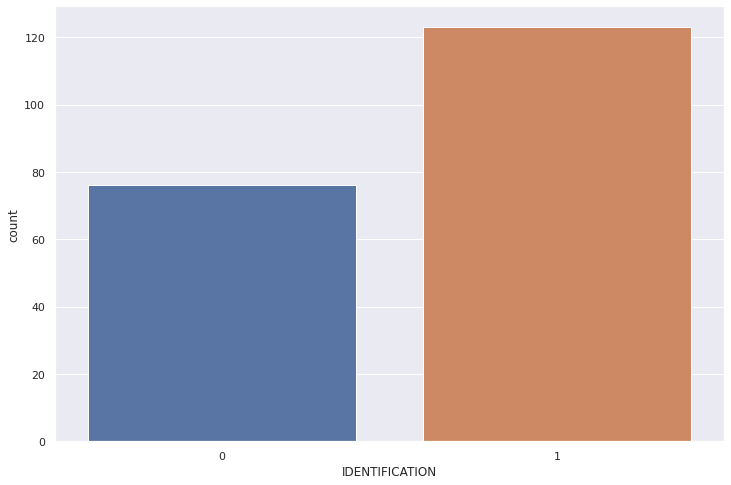

In [233]:
#visualize the count
sns.countplot(df['IDENTIFICATION'])

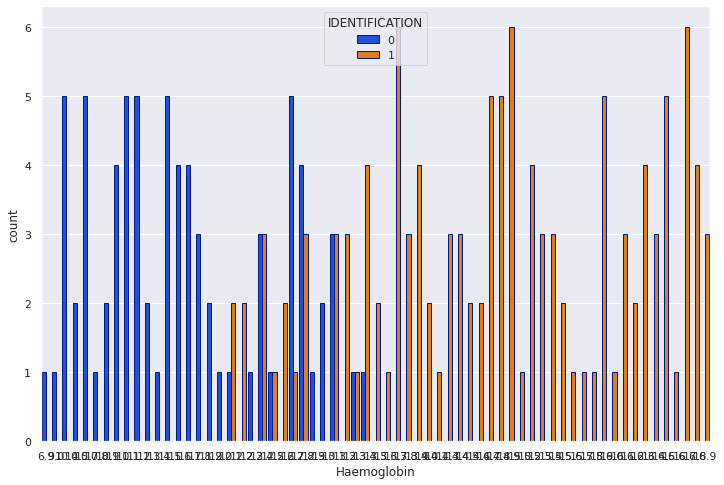

In [234]:
#visualize the data
sns.countplot(x='Haemoglobin', hue='IDENTIFICATION', data=df, palette='bright',edgecolor= sns.color_palette('dark',n_colors=1))

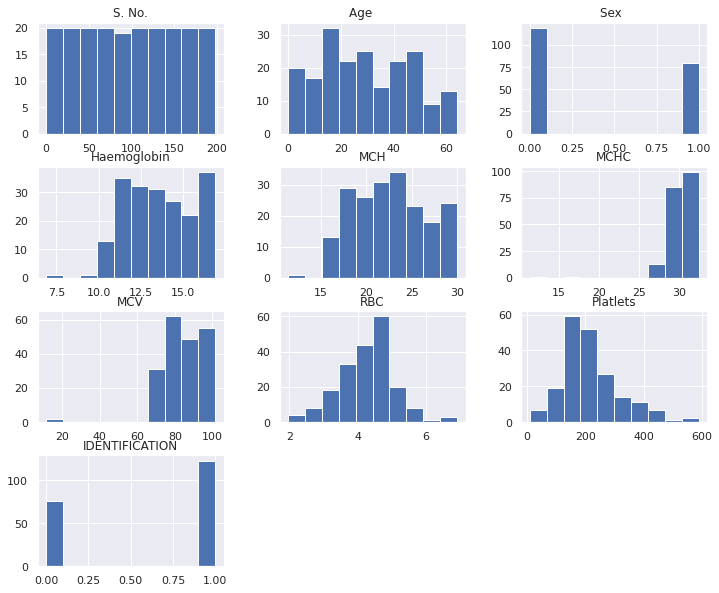

In [235]:
df.hist(figsize=(12,10))
plt.show()

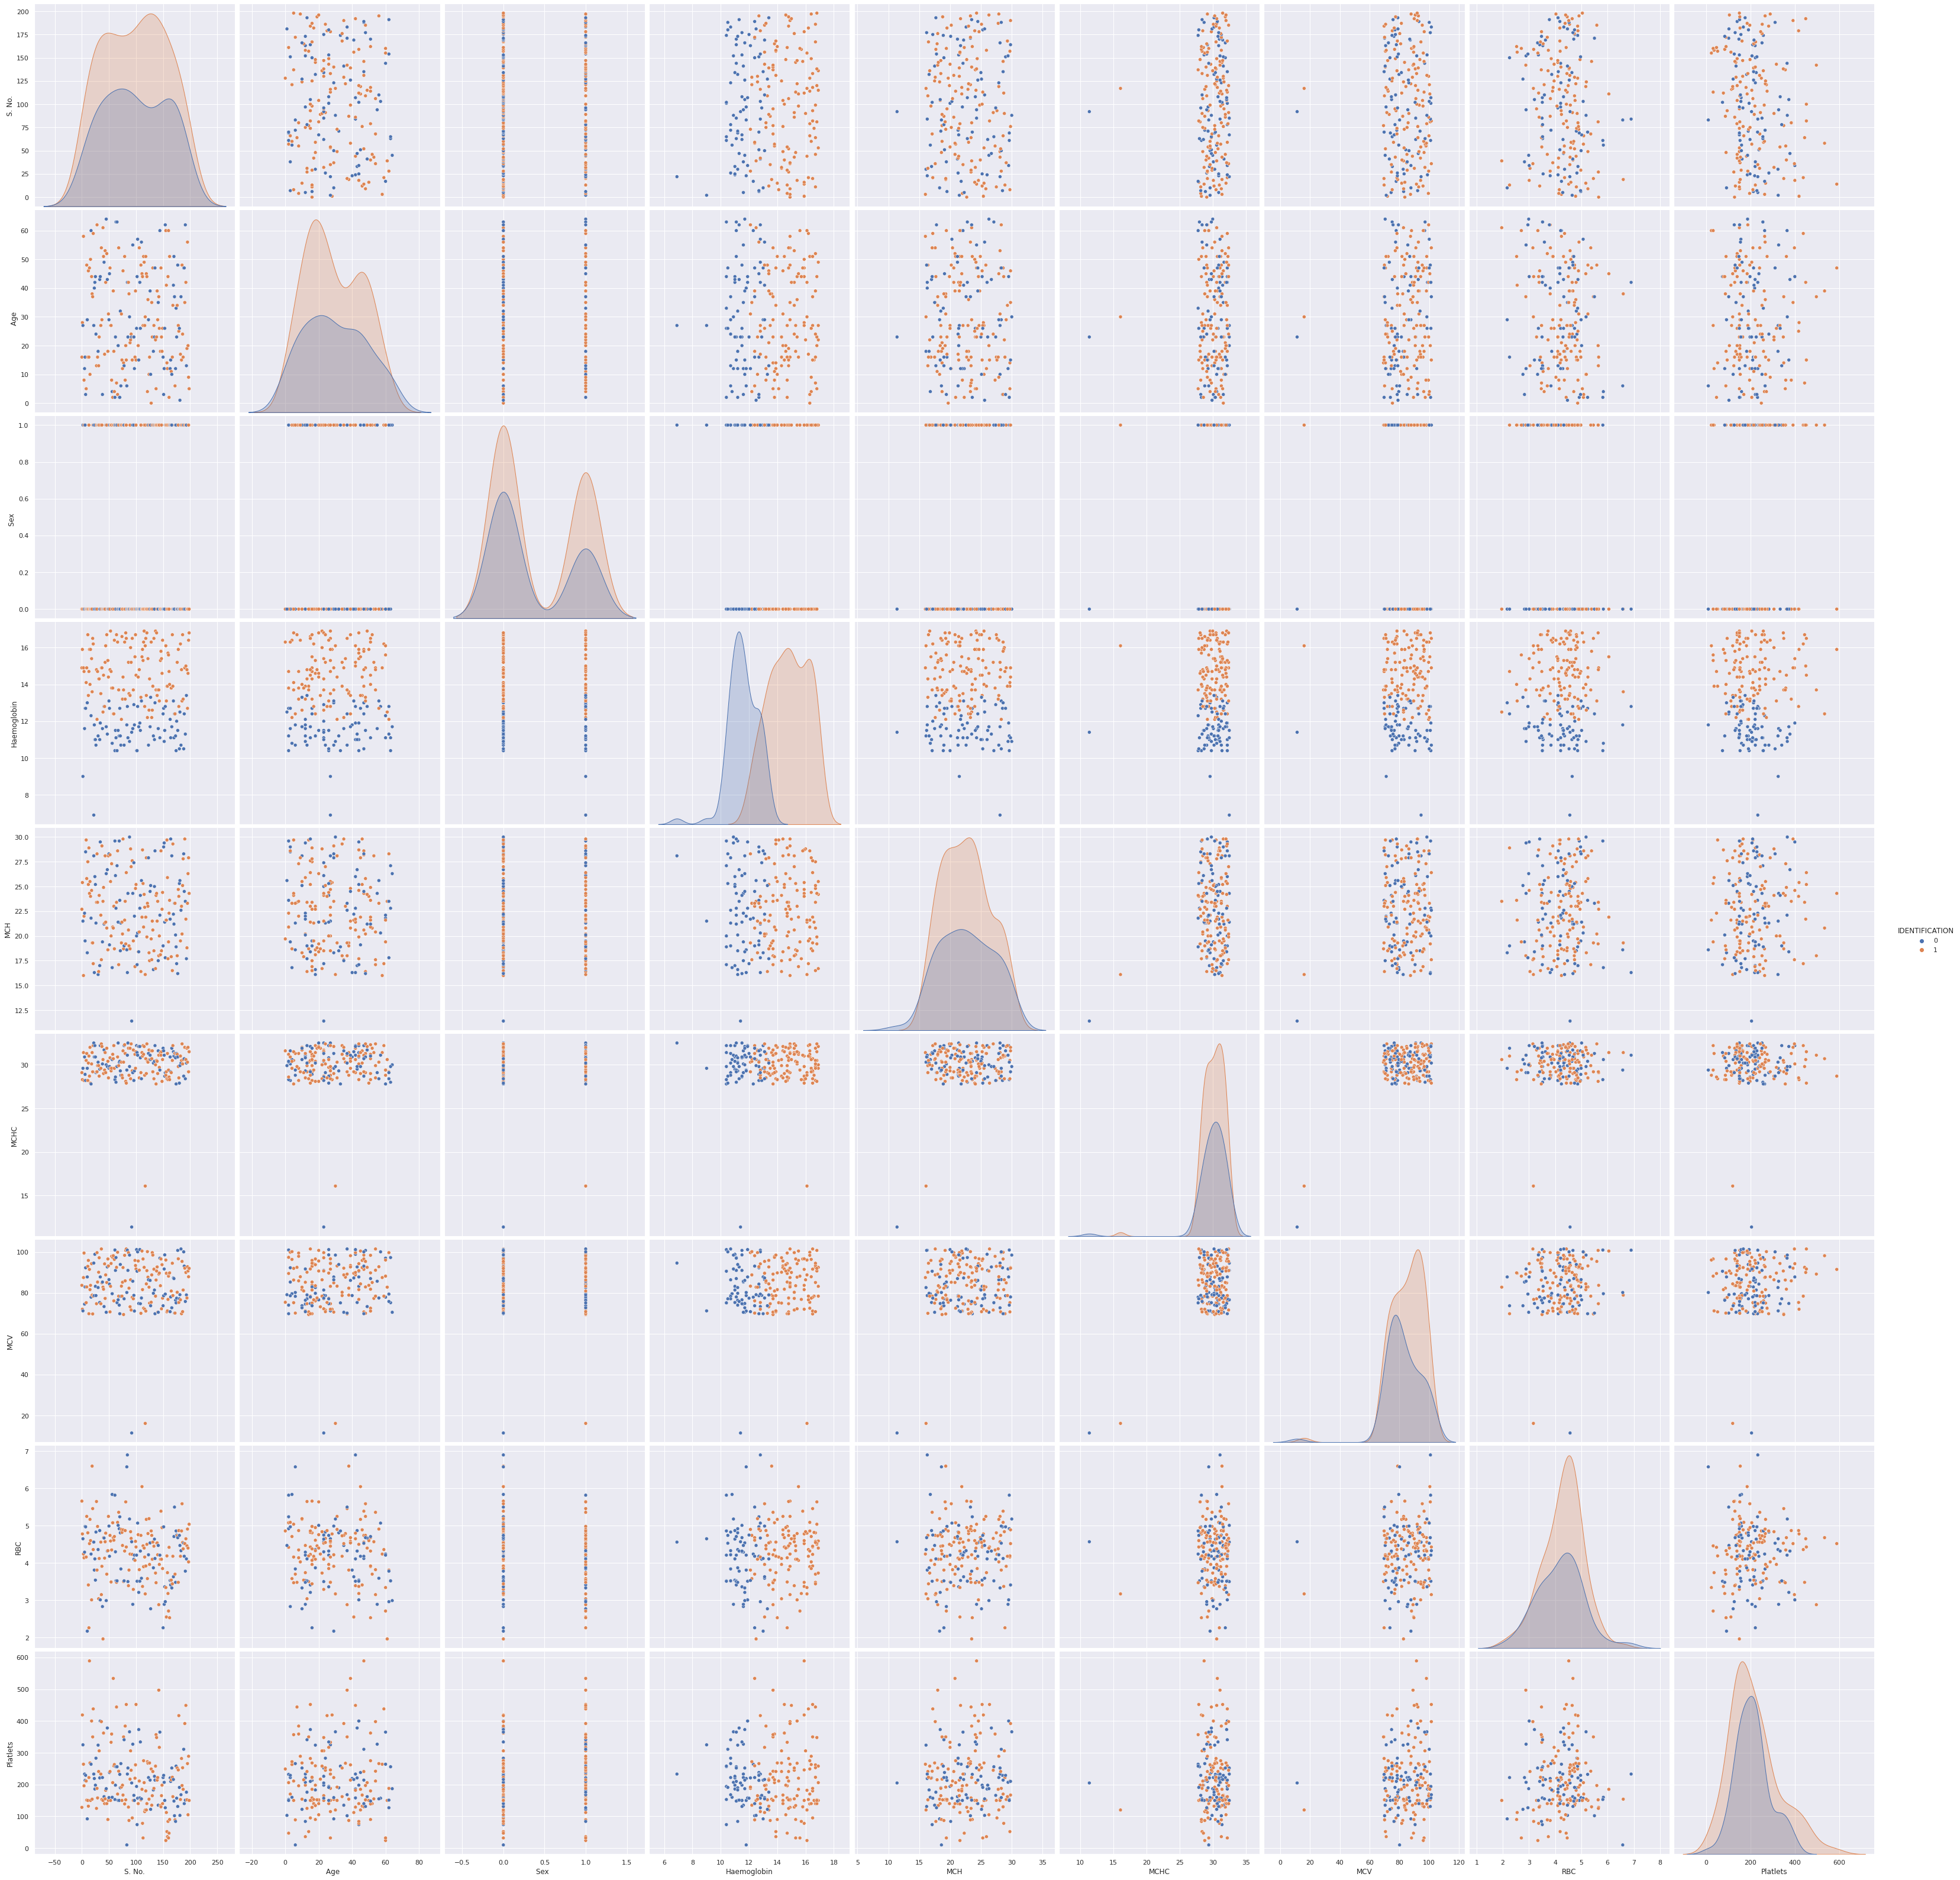

In [236]:
sns.pairplot(df, hue = "IDENTIFICATION", height = 5, aspect = 1);

In [237]:
#get the correlation of the columns
df.corr()

,S. No.,Age,Sex,Haemoglobin,MCH,MCHC,MCV,RBC,Platlets,IDENTIFICATION
S. No.,1.000000,-0.043211,0.049599,0.019102,-0.037135,0.050137,-0.042588,-0.103106,-0.183671,-0.005401
Age,-0.043211,1.000000,-0.109431,-0.001092,-0.048891,0.020218,0.124745,-0.130226,0.013621,-0.020441
Sex,0.049599,-0.109431,1.000000,0.005737,-0.034134,-0.091357,-0.076468,-0.215517,0.197965,0.074945
Haemoglobin,0.019102,-0.001092,0.005737,1.000000,-0.010710,-0.013017,0.056041,0.050113,-0.003212,0.777010
MCH,-0.037135,-0.048891,-0.034134,-0.010710,1.000000,0.142567,0.158468,0.026646,0.046858,-0.006378
MCHC,0.050137,0.020218,-0.091357,-0.013017,0.142567,1.000000,0.447704,0.015165,0.023243,0.023675
MCV,-0.042588,0.124745,-0.076468,0.056041,0.158468,0.447704,1.000000,0.074611,0.098718,0.110435
RBC,-0.103106,-0.130226,-0.215517,0.050113,0.026646,0.015165,0.074611,1.000000,-0.013636,0.059669
Platlets,-0.183671,0.013621,0.197965,-0.003212,0.046858,0.023243,0.098718,-0.013636,1.000000,0.040545
IDENTIFICATION,-0.005401,-0.020441,0.074945,0.777010,-0.006378,0.023675,0.110435,0.059669,0.040545,1.000000


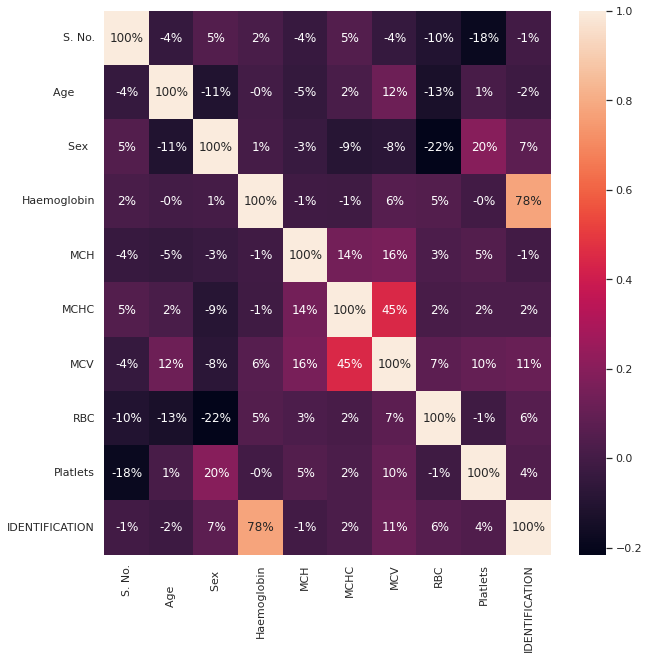

In [238]:
#visualize the data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

In [239]:
#Feature Scaling 
#Min-Max scaler method scales the dataset so that all the input features lie between 0 and 1
X_scaler = MinMaxScaler()
X_scaler.fit(X)
column_names = X.columns
X[column_names] = X_scaler.transform(X)

In [240]:
X = df.drop(columns=['S. No.','IDENTIFICATION'], axis=1)
Y = df['IDENTIFICATION']

In [241]:
#Split the data into 80% training and 20% testing &shuffle
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [242]:
scaler = StandardScaler()

In [243]:
scaler.fit(X_train)

StandardScaler()

In [244]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [245]:
len(X_train)

159

In [246]:
len(X_test)

40

In [247]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [248]:
#create param
model_param = {
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'criterion': ['gini','entropy']
        }
    },
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [20,50,80,120,150]
        }
    },
    'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'param':{
            'n_neighbors': [5,10,15,20,25]
        }
    },
    'LogisticRegression':{
        'model':LogisticRegression(),
        'param':{
            'penalty':['l2']
        }
    },
    'SVC':{
        'model':SVC(),
        'param':{
            'kernel': ['rbf','linear','sigmoid']
        }
    },
    'AdaBoostClassifier':{
        'model':AdaBoostClassifier(),
        'param':{
            'learning_rate': [1,2,3,4,5]
        }
    },

}

In [ ]:
scores = []
for model_name, mp in model_param.items():
  model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
  model_selection.fit(X,Y)
  scores.append({
      'model': model_name,
      'best_score': model_selection.best_score_,
      'best_params': model_selection.best_params_
  })

In [250]:
df_model_score = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df_model_score

,model,best_score,best_params
0,DecisionTreeClassifier,0.868974,{'criterion': 'entropy'}
1,RandomForestClassifier,0.884103,{'n_estimators': 120}
2,KNeighborsClassifier,0.607821,{'n_neighbors': 25}
3,LogisticRegression,0.864103,{'penalty': 'l2'}
4,SVC,0.864487,{'kernel': 'linear'}
5,AdaBoostClassifier,0.859103,{'learning_rate': 1}


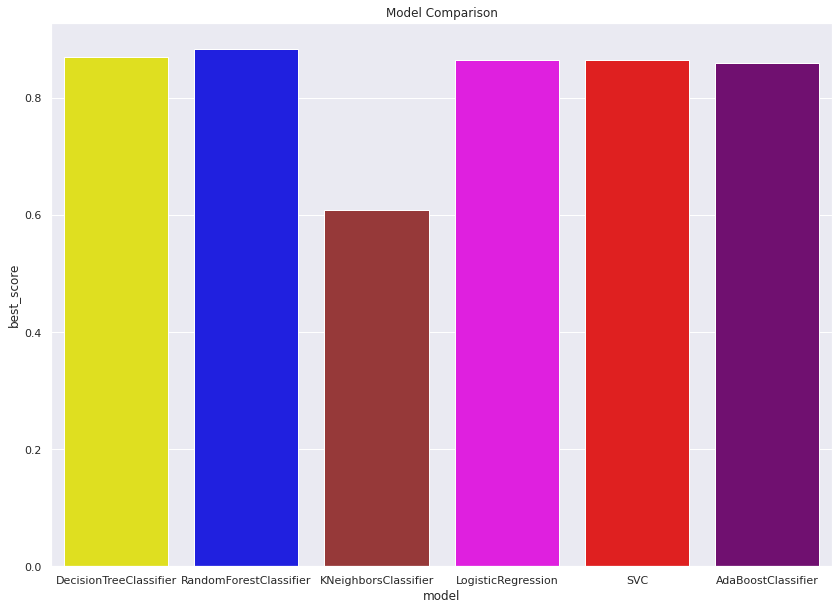

In [251]:
colors = ["yellow","blue","brown","magenta","red", "purple"]
fig = plt.figure(figsize=(14,10))
sns.barplot(x='model',y='best_score',data=df_model_score, palette= colors)
plt.title('Model Comparison');

In [252]:
model_rfc = RandomForestClassifier(n_estimators=120)

In [253]:
model_rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=120)

In [254]:
model_rfc.score(X_test,Y_test)

0.85

In [255]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,model_rfc.predict(X_test))
cm

array([[13,  4],
       [ 2, 21]])

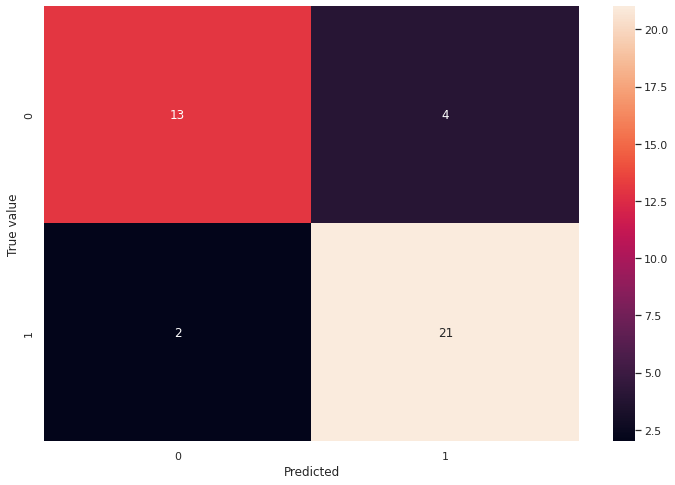

In [256]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')
plt.show()

In [257]:
#Build the model
model = Sequential()
model.add( Dense(256, input_dim = len(X.columns), kernel_initializer= k.initializers.random_normal(seed=13), activation='relu'))
model.add( Dense(1, activation = 'hard_sigmoid'))

In [258]:
#Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [259]:
#Train the model
history = model.fit(X_train, Y_train, epochs = 500, batch_size = X_train.shape[0])

Epoch 1/500
1/1 [==============================] - 0s 391ms/step - loss: 0.6862 - accuracy: 0.5597
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 0.6781 - accuracy: 0.6289
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 0.6701 - accuracy: 0.6918
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 0.6624 - accuracy: 0.7107
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 0.6549 - accuracy: 0.7296
Epoch 6/500
1/1 [==============================] - 0s 14ms/step - loss: 0.6475 - accuracy: 0.7233
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 0.6403 - accuracy: 0.7296
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 0.6332 - accuracy: 0.7358
Epoch 9/500
1/1 [==============================] - 0s 9ms/step - loss: 0.6263 - accuracy: 0.7358
Epoch 10/500
1/1 [==============================] - 0s 8ms/step - loss: 0.6194 - accuracy: 0.7296
Epoch 11/500
1/1 [========

In [261]:
input_data = (40,1,9,21.5,29.6,71.2,4.65,325)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if (prediction[0]==0):
  print("The Person has Anaemia")

else:
  print("The Person is healthy")

[[0.]]
The Person has Anaemia


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [262]:
#Save the model
model.save('ana.model')

INFO:tensorflow:Assets written to: ana.model/assets


Text(0.5, 0, 'epoch')

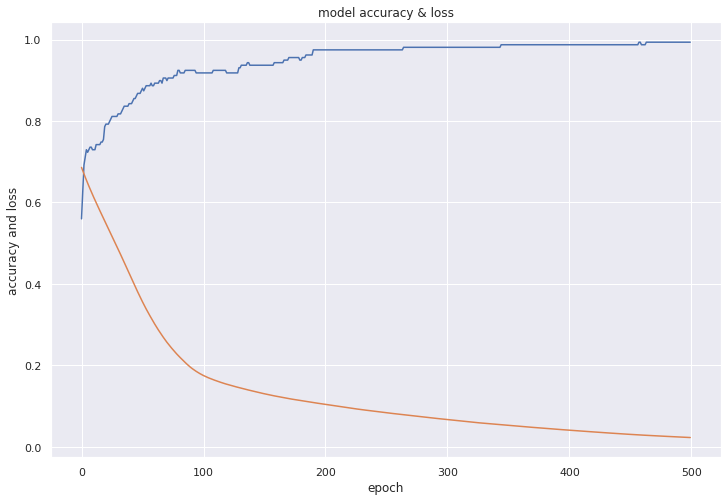

In [263]:
#Visualize the models loss and accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy & loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [264]:
max(history.history['accuracy'])

0.9937106966972351

In [265]:
test_y_predictions = model.predict(X_test)
test_y_predictions

array([[1.        ],
       [1.        ],
       [0.5528755 ],
       [0.47551978],
       [1.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [0.81551415],
       [1.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.9491432 ],
       [1.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.88416964],
       [1.        ],
       [0.        ],
       [0.406234  ],
       [0.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [0.5667929 ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.92777586],
       [0.2818579 ],
       [1.        ],
       [1.        ]], dtype=float32)

In [266]:
#Get the shape of the training and testing dataset
print('shape of training data:', X_train.shape)
print('shape of test data:', X_test.shape)

shape of training data: (159, 8)
shape of test data: (40, 8)


In [267]:
#Show the actual and predicted values
pred = model.predict(X_test)
pred = [1 if Y>=0.5 else 0 for Y in pred]
pred

print('Original : {0}'.format(", ".join(str(x) for x in Y_test)))
print('Predicted : {0}'.format(", ".join(str(x) for x in pred)))

Original : 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1
Predicted : 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1


In [269]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,pred)
print(cm)

[[12  5]
 [ 2 21]]


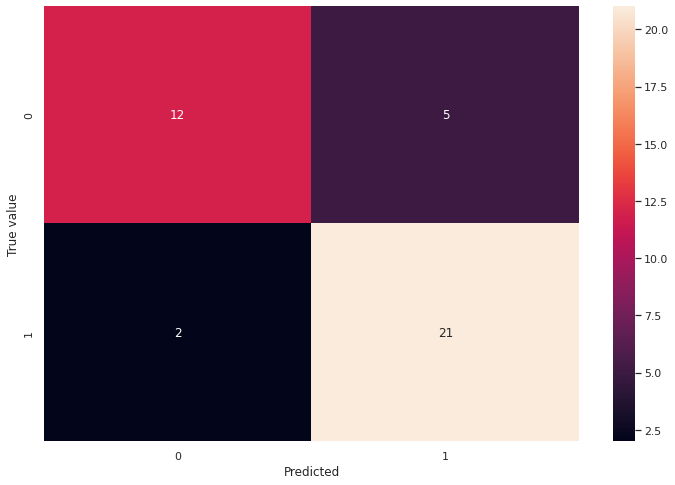

In [270]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')
plt.show()

In [271]:
#Initialize the MLP Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08,hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)  

In [272]:
#Train the model
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [273]:
#Predict for the test set
y_pred=model.predict(X_test)

In [274]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=Y_test,y_pred=y_pred)

In [275]:
#Print the accuracy
print("Accuracy:{:.2f}%".format(accuracy*100))
print(y_pred)

Accuracy:90.00%
[1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1
 0 1 1]


In [277]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(Y_test,y_pred)
print(cm1)

[[14  3]
 [ 1 22]]


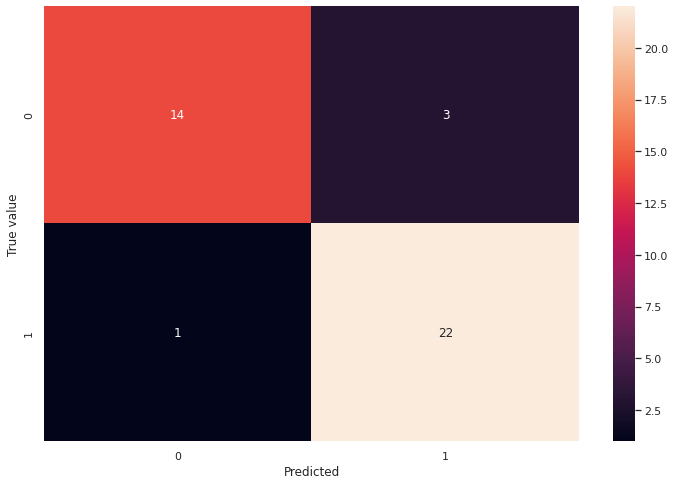

In [278]:
sns.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')
plt.show()